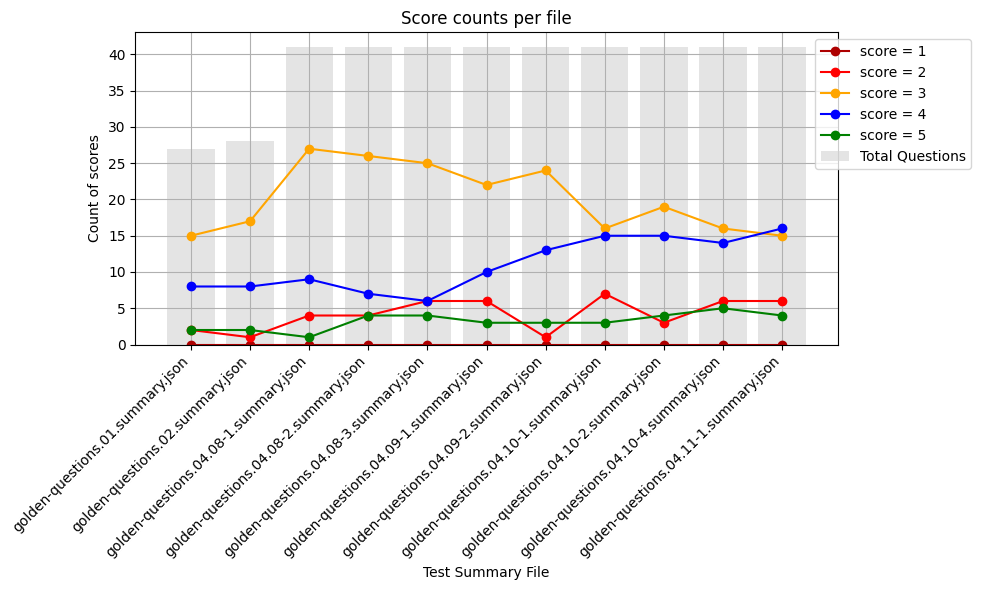

In [1]:
import os
import json
import matplotlib.pyplot as plt
import fnmatch
import numpy as np

# Directory containing JSON files
json_dir = os.path.abspath(os.path.join(os.path.curdir, "..", "..", "eval-data", "summary"))

# Pattern for filtering filenames
file_pattern = 'golden-questions.0*'

# List and sort JSON files with pattern matching
json_files = sorted([file for file in os.listdir(json_dir) if fnmatch.fnmatch(file, file_pattern) and file.endswith('.json')])

# Initialize dictionary to store lengths per key
key_lengths = {}

# Define colors for keys "1" through "5"
colors = {'1': '#ad0000', '2': 'red', '3': 'orange', '4': 'blue', '5': 'green'}

# Process each file
for file in json_files:
    filepath = os.path.join(json_dir, file)
    with open(filepath, 'r') as f:
        data = json.load(f)

    for key, val in data.items():
        if key not in key_lengths:
            key_lengths[key] = []
        key_lengths[key].append(len(val))

# Calculate sums for bar graph
file_sums = [sum(lengths[i] for lengths in key_lengths.values()) for i in range(len(json_files))]

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar graph underlay for sums
bar_width = 0.8
indices = np.arange(len(json_files))
ax1.bar(indices, file_sums, width=bar_width, color='lightgrey', label='Total Questions', alpha=0.6)

# Plot lines for each key with specified colors
for key, lengths in key_lengths.items():
    color = colors.get(key, 'gray')  # Default to gray if key not in specified colors
    ax1.plot(indices, lengths, marker='o', label=f'score = {key}', color=color)

# Graph labels and title
ax1.set_xticks(indices)
ax1.set_xticklabels(json_files, rotation=45, ha='right')
ax1.set_xlabel('Test Summary File')
ax1.set_ylabel('Count of scores')
ax1.set_title('Score counts per file')

# Adjust legend to avoid overlap
ax1.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

ax1.grid(True)

plt.tight_layout()
plt.show()

